# PHAS0031:Computational Physics: Week 5: Assessment
## Joshua Giblin-Burnham(SN.:19052055)

## Introduction:
In this notebook we will will investigate the heat equation in two forms: first, a 2D steady state (equivalent to the Laplace equation); second, a 2D time varying solution (using the forward difference approach). We will consider a bar of length 21m and width 15m. The end of the bar at x=21m will be maintained at 400K, while the other boundaries will be maintained at 300K.

First, we seek a steady-state solution using an iterative approach to an elliptic equation. We have:
$$\frac{\partial^2\theta}{\partial x^2}+\frac{\partial^2\theta}{\partial y^2}=0$$


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Section 1: 
### Set up the SOR solver:
We can apply a centred finite-difference scheme, where we now have points $x_i$ and $y_j$ and we will notate $\phi(x_i,y_j)$ as $\phi_{i,j}$. We can then write:

$$\frac{\phi_{i+1,j}-2\phi_{i,j}+\phi_{i-1,j}}{\mathrm{\Delta}x^2}+\frac{\phi_{i,j+1}-2\phi_{i,j}+\phi_{i,j-1}}{\mathrm{\Delta}y^2}=0$$

If we set $\mathrm{\Delta x}=\mathrm{\Delta y}$, then we can make a considerable simplification:

$$\phi_{i+1,j}+\phi_{i-1,j}+\phi_{i,j+1}+\phi_{i,j-1}-4\phi_{i,j}=0$$

At the simplest level, we need an update for the potential $\phi$ at each step of the iteration, k; if we re-write the equation above, we find:
$$\begin{matrix}\phi_{i,j}&=&\frac{1}{4}\left(\phi_{i+1,j}+\phi_{i-1,j}+\phi_{i,j+1}+\phi_{i,j-1}\right)\\\Rightarrow\phi_{i,j}^{(k+1)}&=&\frac{1}{4}\left(\phi_{i+1,j}^{(k)}+\phi_{i-1,j}^{(k)}+\phi_{i,j+1}^{(k)}+\phi_{i,j-1}^{(k)}\right)\\\end{matrix}$$

Refining this we get the successive over-relaxation (SOR) approach significantly improve the efficiency. Essentially it mixes the present and updated values of $\phi_{i,j}$ via a parameter $\omega$:

$$\phi_{i,j}^{(k+1)}=\frac{1+\omega}{4}\left(\phi_{i+1,j}^{(k)}+\phi_{i-1,j}^{(k)}+\phi_{i,j+1}^{(k)}+\phi_{i,j-1}^{(k)}\right)-\omega\phi_{i,j}^{(k)}$$

In [2]:
def SOR(phi, Ni, Nj, w):
    ''' Update NixNj grid of phi using SOR method 
    Inputs:
    phi    Temperture array of Steady State values
    Ni     i index length
    Nj     j index length
    w      Omega value
    '''
    # Impliments SOR for matrix, exclude i=0, i=Ni, j=0 and j=Nj as they are boundaries
    for i in range(1,Ni-1):
        for j in range(1,Nj-1):
            phi[i,j] = ((1+w)/4)*(phi[i-1,j] + phi[i+1,j] + phi[i,j-1] + phi[i,j+1])-w*phi[i,j]
    
    return phi

###  Set up the array and initial conditions

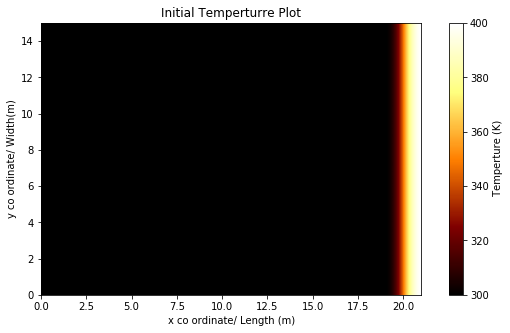

In [3]:
# Set variables
Ni =15
Nj =21

T1 = 300 #K
T2 = 400 #K

# Initial theta matrix
theta = T1 * np.ones([Ni, Nj])
theta[:,Nj-1] = T2
# Note: the way array indexing works j actually indexs x (however this doesnt affect SOR implimentation )

# Plot initial guess
plot1, ax1= plt.subplots(1, figsize=(10,5))
im1= ax1.imshow(theta, extent= (0, 21, 0, 15), origin= 'lower', cmap='afmhot', interpolation='quadric')

# Labels and title
ax1.set_xlabel('x co ordinate/ Length (m)')
ax1.set_ylabel('y co ordinate/ Width(m)')
ax1.set_title('Initial Temperturre Plot')

# Set colour bar 
cbar1= plot1.colorbar(im1, ax= ax1)
cbar1.set_label(' Temperture (K)')
plt.show()

### Run the solver and plot the result

In [4]:
# Set/ intitiates variables
w= 0.5
delta= 1
tol= 1e-8
n= 1

# Initial theta matrix so cell is self contained
theta = T1 * np.ones([Ni, Nj])
theta[:,Nj-1] = T2

# Loops untill within tolerence implimenting SOR
while delta > tol:
    thetain = np.copy(theta)
    theta= SOR(theta, Ni, Nj, w)
    delta =np.max( np.abs( thetain - theta)) 
    n+=1
    
print("Finished after ", n," iterations")

Finished after  167  iterations


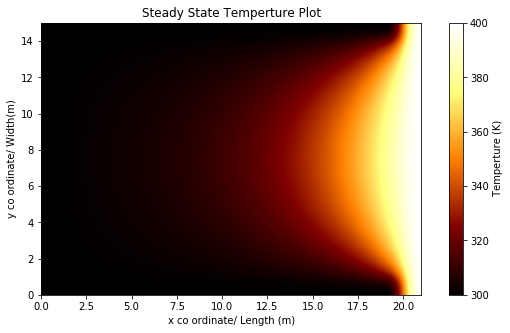

In [5]:
# Plot final temperature
plot2, ax2= plt.subplots(1, figsize=(10,5))
im2= ax2.imshow(theta, extent= (0, 21, 0, 15), origin= 'lower', cmap='afmhot', interpolation='quadric')

# Labels and title
ax2.set_xlabel('x co ordinate/ Length (m)')
ax2.set_ylabel('y co ordinate/ Width(m)')
ax2.set_title('Steady State Temperture Plot')

# Set colour bar
cbar2= plot1.colorbar(im2, ax= ax2)
cbar2.set_label(' Temperture (K)')
plt.show()

#### Comment:
We see over our sucessive relaxations; we get the expected distribution as the boundary condition is equivalent to finding a bar which starts at 300K throughout, and then has one end raised to 400, thus we expext the heat to disperse through. Below we will look at the effect of altering variables

### Interactive plot for varying variables:

In [6]:
def plotSteady(omega, Ni, Nj, T1, T2):
    delta= 1
    tol= 1e-5
    n= 1
    
    # Initial theta matrix
    psi = T1 * np.ones([Ni, Nj])
    psi[:,Nj-1] = T2

    # Loops untill within tolerence implimenting SOR
    while delta > tol:
        psi0 = np.copy(psi)
        psi= SOR(psi, Ni, Nj, omega)
        delta =np.max( np.abs( psi0 - psi)) 
        n+=1
    print("Finished after ", n," iterations")
    
    # Plot final temperature
    plot3, ax3= plt.subplots(1, figsize=(10,5))
    im3= ax3.imshow(psi, extent= (0, 21, 0, 15), origin= 'lower', cmap='afmhot', interpolation='quadric')
    ax3.set_xlabel('x co ordinate/ Length (m)')
    ax3.set_ylabel('y co ordinate/ Width(m)')
    ax3.set_title('Adjustable Temperture Plot')

    # Set colour bar
    cbar3= plot1.colorbar(im3, ax= ax3)
    cbar3.set_label(' Temperture (K)')
    plt.show()

In [7]:
from ipywidgets import interactive
from IPython.display import display

# Careful to not move sliders too fast, at high values there a large computational times
plot3 = interactive(plotSteady, omega=(0, 1, 0.05), Ni=(1, 30, 1), Nj=(1, 30, 1), T1=(0, 800, 100), T2=(0, 800, 100))
display(plot3)

interactive(children=(FloatSlider(value=0.0, description='omega', max=1.0, step=0.05), IntSlider(value=15, des…

#### Comment:
We can note a few things by looking different variables:

Omega- this doesnt effect the plot, however, it effects the number of iterations and computational cost. We thus see a minima and optimal value of omega around 0.7

T1/T2- We see that (unless the same), the absolute values do not effect the distribution, however, they define the temperatue over the distribution( If we make T2 smaller than T1 we flip the temperture so the bar is cooling). Also around $|T1-T2|<100$ we see the number of iterations decrease, persumable as the values to calculate are smaller.

Ni/Nj- We see this streach/ compress the distribution but more importantly greatly effect the number of iterations.

## Section 2:
Second, we will solve the parabolic equation for the time evolution of the bar.

$$\theta_{i,j,n+1}=\theta_{i,j,n}+\zeta\left(\theta_{i+1,j,n}+\theta_{i-1,j,n}+\theta_{i,j+1,n}+\theta_{i,j-1,n}-4\theta_{i,j,n}\right)$$

### Time evolution function:


In [7]:
def theta2D(theta, Ni, Nj, z):
    """Perform explicit forward FD update for heat equation
    Inputs:
    theta   Array of temperature at present timestep
    Ni      i index length
    Nj      j index length
    z       Constant of proportionality
    """
    theta_n1= np.copy(theta)
    
    # We exclude i=0, i=M, j=0 and j=N as they are boundaries
    for i in range(1, Ni-1):
        for j in range(1, Nj-1):
            theta_n1[i,j] = theta[i,j]+ z*( theta[i-1,j] + theta[i+1,j] + theta[i,j-1] + theta[i,j+1] - 4*theta[i,j])
    
    return theta_n1

### Set up initial conditions

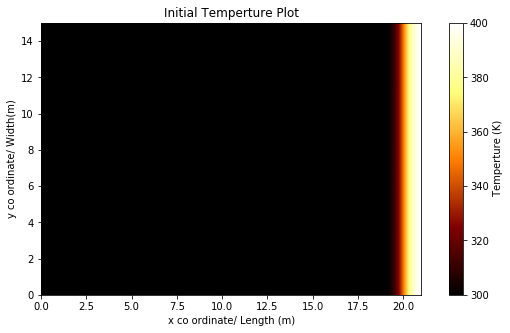

In [8]:
# Set variables
Ni =15
Nj =21

T1 = 300 #K
T2 = 400 #K

# Initial theta matrix
theta0 = T1 * np.ones([Ni, Nj])
theta0[:,Nj-1] = T2

# Plot initial guess
plot4, ax4= plt.subplots(1, figsize=(10,5))
im4= ax4.imshow(theta0, extent= (0, 21, 0, 15), origin= 'lower', cmap='afmhot', interpolation='quadric')
ax4.set_xlabel('x co ordinate/ Length (m)')
ax4.set_ylabel('y co ordinate/ Width(m)')
ax4.set_title('Initial Temperture Plot')

cbar4= plot4.colorbar(im4, ax= ax4)
cbar4.set_label(' Temperture (K)')
plt.show()

### Propagate the solution and store selected points

In [9]:
# Initial theta matrix
theta0 = T1 * np.ones([Ni, Nj])
theta0[:,Nj-1] = T2

# Initiate values 
Nt = 400
z= 0.1 

# Loops evolution over time step
for t in range(Nt):
    theta_n = theta2D(theta0, Ni, Nj, z)
    theta0 = np.copy(theta_n)

### Plot the final and steady-state solutions
Below, we also plot the difference between the two

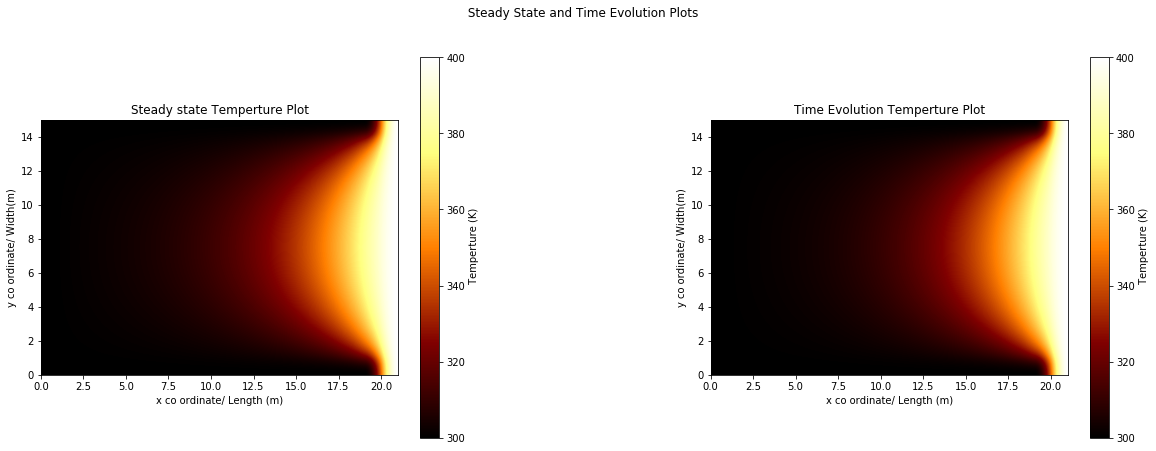

In [10]:
# Plot final temperature
plot5, ax5= plt.subplots(1,2, figsize=(20,7))
plot5.suptitle(' Steady State and Time Evolution Plots')

# Plot steady state
im5a= ax5[0].imshow(theta, extent= (0, 21, 0, 15), origin= 'lower', cmap='afmhot', interpolation='quadric')
ax5[0].set_xlabel('x co ordinate/ Length (m)')
ax5[0].set_ylabel('y co ordinate/ Width(m)')
ax5[0].set_title('Steady state Temperture Plot')

# Set colour bar
cbar5= plot4.colorbar(im5a, ax= ax5[0])
cbar5.set_label(' Temperture (K)')

# Plot time evolution
im5b= ax5[1].imshow(theta0, extent= (0, 21, 0, 15), origin= 'lower', cmap='afmhot', interpolation='quadric')
ax5[1].set_xlabel('x co ordinate/ Length (m)')
ax5[1].set_ylabel('y co ordinate/ Width(m)')
ax5[1].set_title('Time Evolution Temperture Plot')

# Set colour bar
cbar5= plot5.colorbar(im5b, ax= ax5[1])
cbar5.set_label(' Temperture (K)')

plt.subplots_adjust(wspace= 0.5 ) 
plt.show()

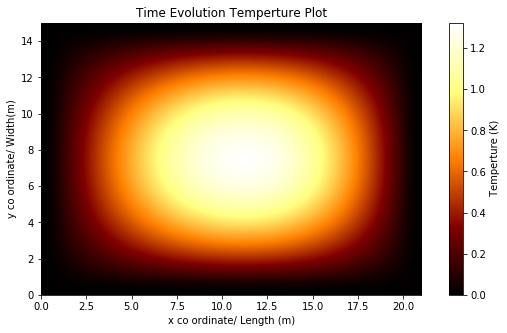

In [11]:
plot6, ax6= plt.subplots(1, figsize=(10,5))

# Plot difference
im6= ax6.imshow(abs(theta0-theta), extent= (0, 21, 0, 15), origin= 'lower', cmap='afmhot', interpolation='quadric')
ax6.set_xlabel('x co ordinate/ Length (m)')
ax6.set_ylabel('y co ordinate/ Width(m)')
ax6.set_title('Time Evolution Temperture Plot')

# Set colour bar
cbar6= plot5.colorbar(im6, ax= ax6)
cbar6.set_label(' Temperture (K)')

#### Comment:
We see over the time evolution the function matches the steady state solution; we expect over infinite time the time varying solution will match the steady state solution. This is as the time evolution is equivalent to finding the steady state solution at for a bar which starts at 300K throughout, and then has one end raised to 400K at t=0. However, we see that they deviate on the order of magnitude of $10^{1}$, as temperture is of order $10^{2}$ this is not particularly visable. This deviation is from the low total number of evolution steps in the time evolution solution, if we increase it to 4000, the difference is $10^{8}$ which is one order below the tolerence for our SOR implimentation. The deviation is maximal in the centre as furthest from the boundarys which are set to be the same. Overal, this gives good agreement from our two methods and shows the time evolution would moves to steady state solution over infinite time.

### Conclusion:
We have sucessfully implimented and seen the complimentiality of both steady state and time evolution approaches

### Section 3: Experimentation:
We look at different boundary conditions for another side being heated

### Animated Plot:

Below we can see the distribution of time evolution over time for various different boundary conditions:

In [12]:
# Animation imports
import time
from IPython.display import clear_output

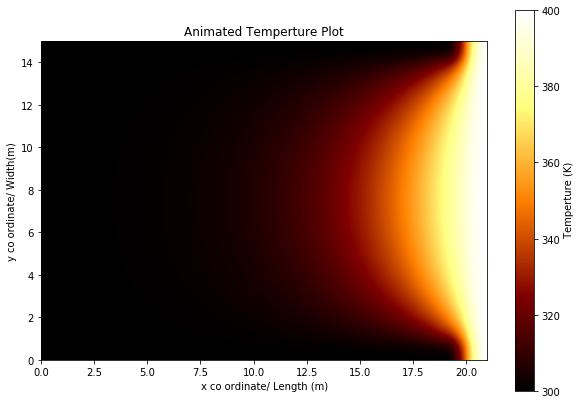

Time 200


In [13]:
# Intiate values
Ni =15
Nj =21

T1 = 300 #K
T2 = 400 #K

# Initial theta matrix
thetat = T1 * np.ones([Ni, Nj])
thetat[:,Nj-1] = T2

Nt = 201
z= 0.1

# Loops for time step
for t in range(Nt):
    theta_n = theta2D(thetat, Ni, Nj, z)
    thetat = np.copy(theta_n)
    
    # Plot ever 5 time steps
    if t%5==0:
        clear_output(wait=True)
        
        # Plot ever 5 time steps
        fig, ax= plt.subplots(1, figsize=(10,7))

        im= ax.imshow(thetat, extent= (0, 21, 0, 15), origin= 'lower', cmap='afmhot', interpolation='quadric')
        ax.set_xlabel('x co ordinate/ Length (m)')
        ax.set_ylabel('y co ordinate/ Width(m)')
        ax.set_title('Animated Temperture Plot')

        cbar= fig.colorbar(im, ax= ax)
        cbar.set_label(' Temperture (K)')
        
        # Pauses and redraws
        plt.draw()
        plt.pause(0.001)  
        
        print('Time',t)
        
# Once run must be stopped or aloud to finish before loading more cells

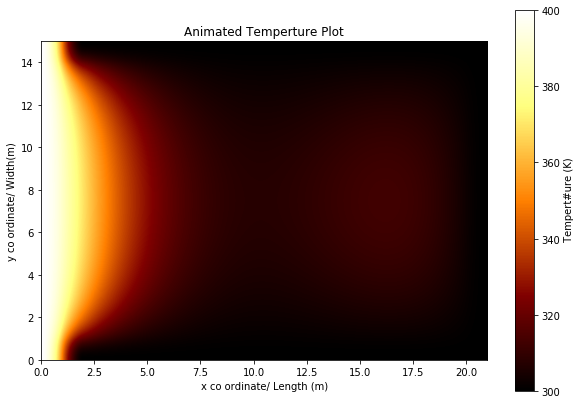

Time 200


In [14]:
# Intiate values
Ni =15
Nj =21

T1 = 300 #K
T2 = 400 #K

# Initial theta matrix
thetat = T1 * np.ones([Ni, Nj])
thetat[:,Nj-1] = T2

Nt = 201
z= 0.1
t=0
# Loops for time step
while t< Nt:
    t+=1
    theta_n = theta2D(thetat, Ni, Nj, z)
    thetat = np.copy(theta_n)
    
        
    thetat[:,Nj-1]= 350-50*np.cos(np.pi*(Nt-t)/Nt)
    thetat[:,0]= 350-50*np.cos(np.pi*t/Nt)
    #thetat[Ni-1,:]= 500-200*np.cos(np.pi*t/Nt)
    #thetat[0,:]= 500-200*np.sin(np.pi*t/Nt)
    
    # Plot ever 5 time steps
    if t%5==0:
        clear_output(wait=True)
        
        # Plot ever 5 time steps
        fig, ax= plt.subplots(1, figsize=(10,7))

        im= ax.imshow(thetat, extent= (0, 21, 0, 15), origin= 'lower', cmap='afmhot', interpolation='quadric',  
                      vmin=T1, vmax= T2)
        ax.set_xlabel('x co ordinate/ Length (m)')
        ax.set_ylabel('y co ordinate/ Width(m)')
        ax.set_title('Animated Temperture Plot')
                     
        cbar= fig.colorbar(im, ax= ax)
        cbar.set_label(' Tempert#ure (K)')
        
        # Pauses and redraws
        plt.draw()
        plt.pause(0.001)  
        
        print('Time',t)
        
# Once run must be stopped or aloud to finish before loading more cells

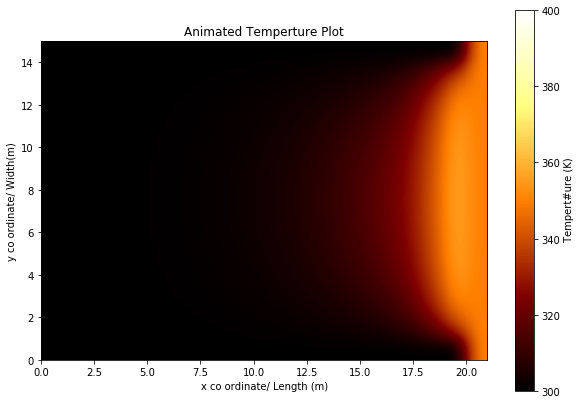

Time 200


In [56]:
# Intiate values
Ni =15
Nj =21

T1 = 300 #K
T2 = 400 #K

# Initial theta matrix
thetat = T1 * np.ones([Ni, Nj])
thetat[:,Nj-1] = T2

Nt = 201
z= 0.1
t=0
# Loops for time step
while t< Nt:
    t+=1
    theta_n = theta2D(thetat, Ni, Nj, z)
    thetat = np.copy(theta_n)
    
        
    thetat[:,Nj-1]= 350-50*np.sin(np.pi*t/20)
    #thetat[:,0]= 400-100*np.cos(np.pi*t/10)
    #thetat[Ni-1,:]= 500-200*np.cos(np.pi*t/Nt)
    #thetat[0,:]= 500-200*np.sin(np.pi*t/Nt)
    
    # Plot ever 5 time steps
    if t%5==0:
        clear_output(wait=True)
        
        # Plot ever 5 time steps
        fig, ax= plt.subplots(1, figsize=(10,7))

        im= ax.imshow(thetat, extent= (0, 21, 0, 15), origin= 'lower', cmap='afmhot', interpolation='quadric',  
                      vmin=T1, vmax= T2)
        ax.set_xlabel('x co ordinate/ Length (m)')
        ax.set_ylabel('y co ordinate/ Width(m)')
        ax.set_title('Animated Temperture Plot')
                     
        cbar= fig.colorbar(im, ax= ax)
        cbar.set_label(' Tempert#ure (K)')
        
        # Pauses and redraws
        plt.draw()
        plt.pause(0.001)  
        
        print('Time',t)
        
# Once run must be stopped or aloud to finish before loading more cells

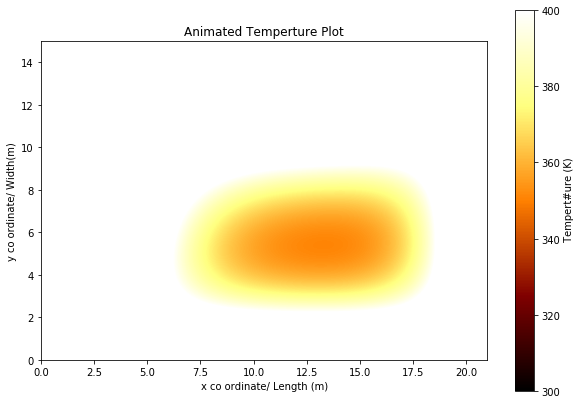

Time 200


In [51]:
# Intiate values
Ni =15
Nj =21

T1 = 300 #K
T2 = 400 #K

# Initial theta matrix
thetat = T1 * np.ones([Ni, Nj])
thetat[:,Nj-1] = T2

Nt = 201
z= 0.1
t=0
# Loops for time step
while t< Nt:
    t+=1
    theta_n = theta2D(thetat, Ni, Nj, z)
    thetat = np.copy(theta_n)
    
        
    thetat[:,Nj-1]= 500-200*np.sin(np.pi*t/Nt)
    thetat[:,0]= 500-200*np.cos(np.pi*t/Nt)
    thetat[Ni-1,:]= 500-200*np.cos(np.pi*t/Nt)
    thetat[0,:]= 500-200*np.sin(np.pi*t/Nt)
    
    # Plot ever 5 time steps
    if t%5==0:
        clear_output(wait=True)
        
        # Plot ever 5 time steps
        fig, ax= plt.subplots(1, figsize=(10,7))

        im= ax.imshow(thetat, extent= (0, 21, 0, 15), origin= 'lower', cmap='afmhot', interpolation='quadric',
                     vmin=T1, vmax= T2)
        ax.set_xlabel('x co ordinate/ Length (m)')
        ax.set_ylabel('y co ordinate/ Width(m)')
        ax.set_title('Animated Temperture Plot')

        cbar= fig.colorbar(im, ax= ax)
        cbar.set_label(' Tempert#ure (K)')
        
        # Pauses and redraws
        plt.draw()
        plt.pause(0.001)  
        
        print('Time',t)
        
# Once run must be stopped or aloud to finish before loading more cells

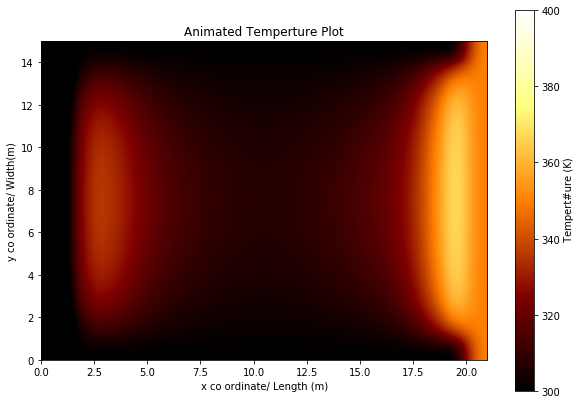

Time 200


In [15]:
# Intiate values
Ni =15
Nj =21

T1 = 300 #K
T2 = 400 #K

# Initial theta matrix
thetat = T1 * np.ones([Ni, Nj])
thetat[:,Nj-1] = T2

Nt = 201
z= 0.1
t=0
# Loops for time step
while t< Nt:
    t+=1
    theta_n = theta2D(thetat, Ni, Nj, z)
    thetat = np.copy(theta_n)
    
        
    thetat[:,Nj-1]= 350-100*np.sin(np.pi*t/20)
    thetat[:,0]= 350-100*np.cos(np.pi*t/20)
    #thetat[Ni-1,:]= 500-200*np.cos(np.pi*t/Nt)
    #thetat[0,:]= 500-200*np.sin(np.pi*t/Nt)
    
    # Plot ever 5 time steps
    if t%5==0:
        clear_output(wait=True)
        
        # Plot ever 5 time steps
        fig, ax= plt.subplots(1, figsize=(10,7))

        im= ax.imshow(thetat, extent= (0, 21, 0, 15), origin= 'lower', cmap='afmhot', interpolation='quadric',  
                      vmin=T1, vmax= T2)
        ax.set_xlabel('x co ordinate/ Length (m)')
        ax.set_ylabel('y co ordinate/ Width(m)')
        ax.set_title('Animated Temperture Plot')
                     
        cbar= fig.colorbar(im, ax= ax)
        cbar.set_label(' Tempert#ure (K)')
        
        # Pauses and redraws
        plt.draw()
        plt.pause(0.001)  
        
        print('Time',t)
        
# Once run must be stopped or aloud to finish before loading more cells

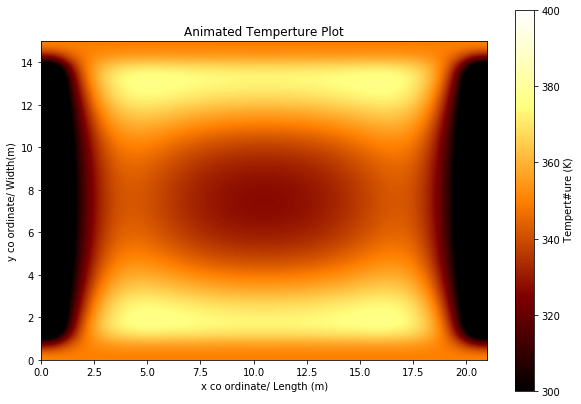

Time 200


In [16]:
# Intiate values
Ni =15
Nj =21

T1 = 300 #K
T2 = 400 #K

# Initial theta matrix
thetat = T1 * np.ones([Ni, Nj])
thetat[:,Nj-1] = T2

Nt = 201
z= 0.1
t=0
# Loops for time step
while t< Nt:
    t+=1
    theta_n = theta2D(thetat, Ni, Nj, z)
    thetat = np.copy(theta_n)
    
        
    thetat[:,Nj-1]= 350-100*np.cos(np.pi*t/50)
    thetat[:,0]= 350-100*np.cos(np.pi*t/50)
    thetat[Ni-1,:]= 350-100*np.sin(np.pi*t/50)
    thetat[0,:]= 350-100*np.sin(np.pi*t/50)
    
    # Plot ever 5 time steps
    if t%5==0:
        clear_output(wait=True)
        
        # Plot ever 5 time steps
        fig, ax= plt.subplots(1, figsize=(10,7))

        im= ax.imshow(thetat, extent= (0, 21, 0, 15), origin= 'lower', cmap='afmhot', interpolation='quadric',  
                      vmin=T1, vmax= T2)
        ax.set_xlabel('x co ordinate/ Length (m)')
        ax.set_ylabel('y co ordinate/ Width(m)')
        ax.set_title('Animated Temperture Plot')
                     
        cbar= fig.colorbar(im, ax= ax)
        cbar.set_label(' Tempert#ure (K)')
        
        # Pauses and redraws
        plt.draw()
        plt.pause(0.001)  
        
        print('Time',t)
        
# Once run must be stopped or aloud to finish before loading more cells